In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv("../data/levels_features.csv")
df.rename(columns={"level_name": "level"}, inplace=True)

In [17]:
df.head()

,level,Number of Robots,Number of Scripts,Number of Consoles,Number of Guards,Activate,AndOperator,Enemy,Exit,FieldGate,...,RedArea,Terminal,TurnBack,TurnLeft,TurnRight,Wait,WallFront,WallLeft,WallRight,While
0,levels/blocklymaze/niveau09.xml,1,1,0,0,0,0,0,-1,0,...,0,0,0,-1,-1,0,0,0,0,-1
1,levels/blocklymaze/niveau08.xml,1,1,0,0,0,0,0,-1,0,...,0,0,0,-1,-1,0,0,0,0,-1
2,levels/blocklymaze/niveau01.xml,1,1,0,0,0,0,0,0,0,...,0,0,0,-1,-1,0,0,0,0,0
3,levels/blocklymaze/niveau03.xml,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,levels/blocklymaze/niveau02.xml,1,1,0,0,0,0,0,0,0,...,0,0,0,-1,-1,0,0,0,0,0


In [18]:
levels_df = pd.read_csv("../data/prod_levels_metrics.csv")

levels_df = levels_df[['level', 'difficulty']]

levels_df.head()

,level,difficulty
0,levels/tutoriel/tutoriel.xml,0.366489
1,levels/explorateur/niveau01.xml,0.047334
2,levels/explorateur/niveau02.xml,0.186798
3,levels/explorateur/niveau03.xml,0.347134
4,levels/explorateur/niveau04.xml,0.430597


In [19]:
df = df.merge(levels_df, on='level', how='left')

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.replace(-1, 999, inplace=True)
df.replace(0, -999, inplace=True)

df.head()

,level,Number of Robots,Number of Scripts,Number of Consoles,Number of Guards,Activate,AndOperator,Enemy,Exit,FieldGate,...,Terminal,TurnBack,TurnLeft,TurnRight,Wait,WallFront,WallLeft,WallRight,While,difficulty
0,levels/blocklymaze/niveau09.xml,1,1,-999,-999,-999,-999,-999,999,-999,...,-999,-999,999,999,-999,-999,-999,-999,999,0.498140
1,levels/blocklymaze/niveau08.xml,1,1,-999,-999,-999,-999,-999,999,-999,...,-999,-999,999,999,-999,-999,-999,-999,999,0.605243
3,levels/blocklymaze/niveau01.xml,1,1,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,999,999,-999,-999,-999,-999,-999,0.143681
4,levels/blocklymaze/niveau03.xml,1,1,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,0.214471
5,levels/blocklymaze/niveau02.xml,1,1,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,999,999,-999,-999,-999,-999,-999,0.218719


In [20]:
X = df.drop(columns=['level','difficulty'])  
y = df['difficulty']



In [21]:
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Evaluate the model
y_pred = model.predict(X)
print(f"Mean Squared Error: {mean_squared_error(y, y_pred)}")

Mean Squared Error: 0.014216836537012


In [22]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

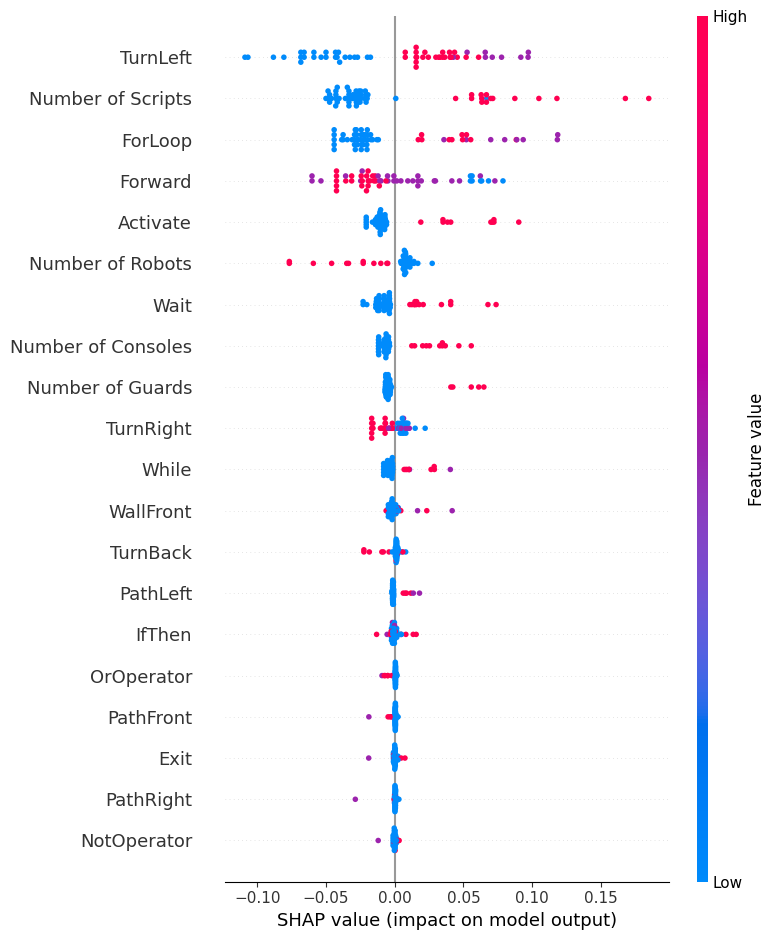

In [23]:
shap.summary_plot(shap_values, X)